<a href="https://colab.research.google.com/github/justbriang/ML_Task/blob/main/KeyFacialkeypoints_%26_EmotionsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project  two models were built, both of which arebased on the resnet architecture(Why resnet? great track record in computer vision tasks plus its ability to overcome the vanishing gradient problem).


1.  The first model will be one to predict key point positions onface images.
2.  The second model will be one to detect facial expressions


These were motivated for competitions on Kaggle i.e. Facial Keypoints Detection(5 years ago) and the Facial Expression Recognition Challenge(8 years ago)

Datasets were obtained from kaggle


The objective of the first task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:

•	tracking faces in images and video
•	analysing facial expressions
•	detecting dysmorphic facial signs for medical diagnosis
•	biometrics / face recognition


Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.

Acknowledgements
The Detecing facial keypoints dataset was graciously provided by Dr. Yoshua Bengio of the University of Montreal. James Petterson.

The objective of second task is to identify the emotions of a person based on facial expressions. This is multinormial problem based on 5 classes.


The tasks were pretty challenging, but a good point of learning as it pushed us into carrying out intensive research to understand more concepts thus addding great value to our ML knowledge.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Navigate to the location of the data on google drive
%cd /content/drive/MyDrive/Emotion AI

/content/drive/.shortcut-targets-by-id/1-47BvaQpCokW09OTP4Tf8N9CZIPi0qi2/Emotion AI


In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
# load facial key points data
key_facial_points_df = pd.read_csv('data.csv')
key_facial_points_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,24.972418,36.348203,56.402841,31.171586,80.709708,30.595738,38.187845,30.595738,17.275454,29.534964,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,15.979592,38.076531,56.941270,29.605102,81.314059,30.754762,35.059410,29.566780,8.578912,32.096032,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,21.621652,39.095524,62.388142,32.089787,85.829396,38.724104,42.595762,30.541779,11.230184,34.485512,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,16.850204,44.409861,51.463469,27.161327,77.354898,19.562755,34.135510,32.830102,9.731633,41.152347,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
key_facial_points_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
key_facial_points_df['Image'].shape

(2140,)

As can be seen from the cell above, the dataframe has 2140 rows, which indicates that the dataset is composed of 2140 images

#Data Preparation and understanding

#Check for null values in the dataframe

In [ ]:
key_facial_points_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

Its clear that the dataset does not have any null values

 Since values for the image(last column of the df) are given as space separated string, separate the values using ' ' as separator.
 Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96) - arbitrary value(Feel free to try different values for the shape)


In [ ]:
key_facial_points_df['Image'] = key_facial_points_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

Sanity check,check the shape of an image 

In [ ]:
key_facial_points_df['Image'][0].shape

(96, 96)

#Further study the data

image visualization to better understand the dataset in hand : print image and overlay on it the key facial points(or rather indicate the key facial points) based on the coordinate values(x,y) provided for the key facial points

This is also a sanity check, just to ensure the labels provided are accurate

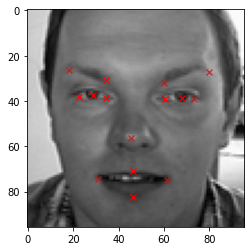

In [ ]:
#Plot a random image from the dataset
#note:Everytime you rerun the cell it displays a differenta and random image from the dataset and onn it an overlay of the key facial points provided in the dataset
i = np.random.randint(1, len(key_facial_points_df))
plt.imshow(key_facial_points_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(key_facial_points_df.loc[i][j-1], key_facial_points_df.loc[i][j], 'rx')

#Image augumentation

Image augmentation is a technique of altering the existing data to create some more data for the model training process.
This serves to artificially expand the available dataset for training a deep learning model.
This is serves to increase the model performance(generalizability increases) in the long run, as we know that deep learning model are data hungry and usually perfom vetter when more data is used in training(ofcourse upto a given threshhold)

In [ ]:
# Create a new copy of the dataframe
import copy
key_facial_points_df_copy = copy.copy(key_facial_points_df)

# Obtain the columns in the dataframe

In [ ]:


cols = key_facial_points_df_copy.columns[:-1]
cols

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

# Horizontal Flip - flip the images along y axis

In [ ]:
#using the numpy library
key_facial_points_df_copy['Image'] = key_facial_points_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

 since we are flipping horizontally, y coordinate values would be the same
 Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image , which in our case is 96.

In [ ]:
for i in range(len(cols)):
  if i%2 == 0:
    key_facial_points_df_copy[cols[i]] = key_facial_points_df_copy[cols[i]].apply(lambda x: 96. - float(x) )

#Sanity check

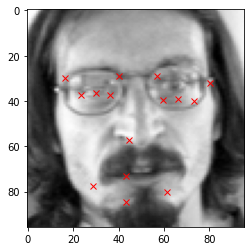

In [ ]:
# Show the Original image, picking a random image - image number 100
plt.imshow(key_facial_points_df['Image'][100], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(key_facial_points_df.loc[0][j-1], key_facial_points_df.loc[0][j], 'rx')

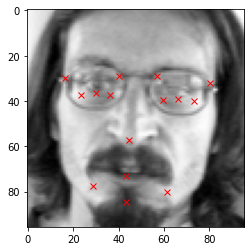

In [ ]:
# Show the flipped image, of the above image
plt.imshow(key_facial_points_df_copy['Image'][100], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(key_facial_points_df.loc[0][j-1], key_facial_points_df_copy.loc[0][j], 'rx')

Join(concat) the new dataframe(one with augmented values) to the original dataframe 

In [ ]:
new_df = np.concatenate((key_facial_points_df, key_facial_points_df_copy))

sanity check

In [ ]:
new_df.shape

(4280, 31)

Results is okay and as you can see the data has now doubles from 2140 to 4280

#Vertically flipping the images
Note:Here we are flipping along x-axis and thus x co-ordinates won't change

In [ ]:
#create a copy of original df
key_facial_points_df_copy = copy.copy(key_facial_points_df)

In [ ]:
#flip vertically(Requires coordinate knowlegde and decent understanding of tranformations, plus ofcourse pandas library)
key_facial_points_df_copy['Image'] = key_facial_points_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(cols)):
  if i%2 == 1:
    key_facial_points_df_copy[cols[i]] = key_facial_points_df_copy[cols[i]].apply(lambda x: 96. - float(x) )

Sanity check just to ensure we are still on track

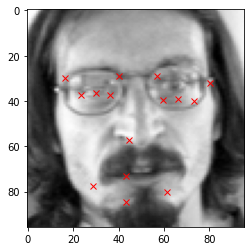

In [ ]:
#original image
plt.imshow(key_facial_points_df['Image'][100], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(key_facial_points_df.loc[0][j-1], key_facial_points_df.loc[0][j], 'rx')

Flipped image, clearly we did the vertical flip successfuly, now we merge to the new_df

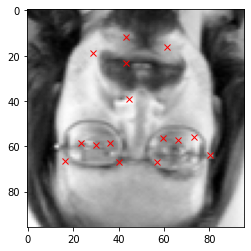

In [ ]:
plt.imshow(key_facial_points_df_copy['Image'][100], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(key_facial_points_df_copy.loc[0][j-1], key_facial_points_df_copy.loc[0][j], 'rx')

#Concatination of the new_df with the vertically flipped df

In [ ]:
#before concat
new_df.shape

(4280, 31)

In [ ]:
new_df = np.concatenate((new_df, key_facial_points_df_copy))

In [ ]:
#sanity check after concat
new_df.shape

(6420, 31)

Once again the data has grown(increased) 

#DATA NORMALIZATION

First we obtain our images separately,since that will be our X.
In order to do that we need to obtain values of the 31st column, since that is the column with values of the our images

In [ ]:
# since index start from 0, we refer to 31st column by 30, python 101..
img = new_df[:,30]



Normalize the images
 Scales values of the pixels in 0-1 range.
 Image normalization is a typical process in image processing that changes the range of pixel intensity values. Its normal purpose is to convert an input image into a range of pixel values that are more familiar or normal to the senses.
 Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network

In [ ]:
# Normalize the images
img = img/255.




Create an empty array of shape (x, 96, 96, 1) to feed the model
This array will be populated using the imaged values, and then later used as input into the model for training

In [ ]:

X = np.empty((len(img), 96, 96, 1))


In [ ]:
# Iterate through the img list and add image values to the empty array a
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

Now we will obtain our target(y)

In [ ]:
# These are values for all the columns upto column 30, column(0->30)
y = new_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

#Test Train Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sanity check


In [ ]:
X_test.shape

(1284, 96, 96, 1)

In [ ]:
X_train.shape

(5136, 96, 96, 1)

#BUILD DEEP RESIDUAL NEURAL NETWORK FOR KEY FACIAL POINTS DETECTION MODEL
Probably the most challenging part of the entire project, building a resnet model from ground up. 
Although the reading a few 100 documents and tutorials, was very helpful in understanding the basic intution of resnet and thus being able to implement a simple custom architecture of a resnet

We created a function for the architecture as we intent to use it in both models and thus for reusability we used a function for the res block

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 18,016,286
Trainable params: 18,007,710
Non-trainable params: 8,576
__________________________________________________________________________________________________


#Compile and Train Facial Point Detection Model

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.00001)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = 'adam' , metrics = ['accuracy'])


In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.05)

Epoch 1/50
153/153 [==============================] - 41s 62ms/step - loss: 1387.1415 - accuracy: 0.3005 - val_loss: 963.2450 - val_accuracy: 0.4358
Epoch 2/50
153/153 [==============================] - 8s 55ms/step - loss: 960.7729 - accuracy: 0.4247 - val_loss: 964.1058 - val_accuracy: 0.4358
Epoch 3/50
153/153 [==============================] - 8s 54ms/step - loss: 959.8910 - accuracy: 0.4275 - val_loss: 963.2150 - val_accuracy: 0.4553
Epoch 4/50
153/153 [==============================] - 8s 55ms/step - loss: 959.2000 - accuracy: 0.4306 - val_loss: 965.5015 - val_accuracy: 0.4553
Epoch 5/50
153/153 [==============================] - 8s 54ms/step - loss: 961.8918 - accuracy: 0.4380 - val_loss: 964.8222 - val_accuracy: 0.4358
Epoch 6/50
153/153 [==============================] - 8s 54ms/step - loss: 792.5463 - accuracy: 0.5915 - val_loss: 575.7722 - val_accuracy: 0.8016
Epoch 7/50
153/153 [==============================] - 8s 54ms/step - loss: 573.9511 - accuracy: 0.7772 - val_loss: 5

# Assess trained model

In [ ]:
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 1s 17ms/step - loss: 376.6475 - accuracy: 0.8014
Accuracy : 0.8014018535614014


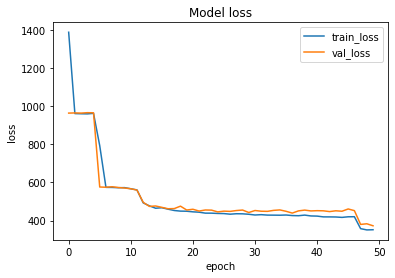

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

We can see that the model converged reasonably quickly and both train and test performance remained equivalent. The performance and convergence behavior of the model suggest that mean squared error is a good match for a neural network learning this problem.

# PART 2. FACIAL EXPRESSION DETECTION

IMPORT & EXPLORE DATASET FOR FACIAL EXPRESSION DETECTION

In [ ]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialexpression_df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [ ]:
facialexpression_df[' pixels'][0] # String format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# function to convert pixel values in string format to array format
#create a function for converting pixel valyes as this is neater and more compact way of coding and also we will need to refer to this later, thus we can just call it by function name
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Resize images from (48, 48) to (96, 96) for easy of interelation with the previously trained model(facial point detection model)
#create a function for resizing as we will need to refer to this later, thus we can just call it by function name
def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
#call the convert pixel values in string format to array format function passing to it the pixel for each image
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
#call the resizing function passing to it the pixel for each image
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

sanity check
as you can see the pixel values we actually converted to arrayfrom string, the resizing bit is tricky to inpect by the eye but we will be checking the shape to see if size is 96 by 96 in the next few cells

In [ ]:
facialexpression_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


Check size of dataframe to know the size of our dataset

In [ ]:

facialexpression_df.shape

(24568, 2)

Check for null/missing values in our dataset,
Lucky for us the dataset is complete no null values

In [ ]:
facialexpression_df.isna().sum()

emotion    0
 pixels    0
dtype: int64

Visualize the first image in the dataframe and make sure that the image is not distorted by resizing or reshaping operations

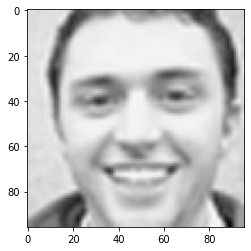

In [ ]:
plt.imshow(facialexpression_df[' pixels'][20], cmap = 'gray')

#sanity check for the dataset
visualize the images alongside their labels
This is where the label_to_text dictionary we created comes into play and the understanding of our dataset. Our dataset has 5 main emotions, as indicated inthe dictionary, and in visualizing these omages alongside their labels, we will need to loop through the data , checking for the int value and matching it to the label on the dictionary ; label_to_text. In this part we will loop through the dataset and display atleast a single image for each emotion. Just to verify the labeling of our dataset

In [ ]:
#verify that there only 5 classes of emotions
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [ ]:
#create the text lables for each class as directed in the image source(Kaggle)
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

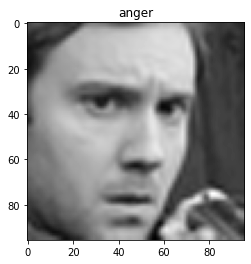

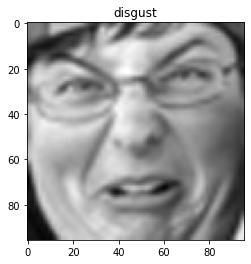

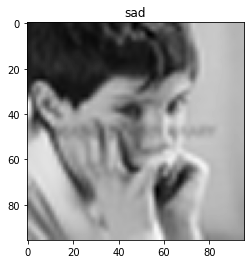

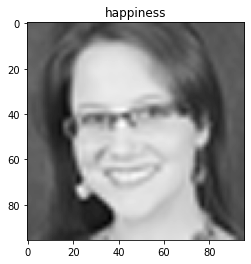

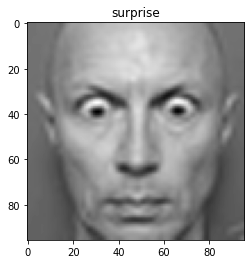

In [ ]:

#display a single image for each emotion class
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

In [ ]:
#check the balance in the data distribution across the 5 classes
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

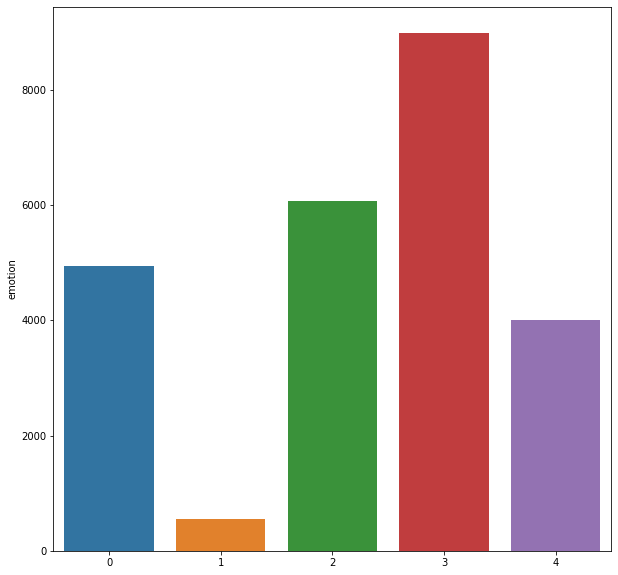

In [ ]:
#visualizualizing the balance in the data distribution across the 5 classes
plt.figure(figsize = (10,10))
sns.barplot(x =facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

#PERFORM DATA PREPARATION AND IMAGE AUGMENTATION
Just like we did for the first data set , we will now prepare the dataset

In [ ]:

from tensorflow.keras.utils import to_categorical

In [ ]:
#we will first separate the labels from the features


X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


sanity check


In [ ]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#we will use numpys stack() function to join X which is a sequence of same dimension arrays along a new axis
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


And as we had said earlier we can now confirm that the images were truly resized to 96 by 96

# split the dataframe in to train, test
As we do so we will pass a shuffle parameter that ensures that our train test splits are truly random i.e. not biased

We will also create a validation dataset, for the purposes of cross validation as we train

In [ ]:


X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.2, shuffle = True)
#validation data set, in th case 50% of the test size
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

sanity check

In [ ]:
X_train.shape

(19654, 96, 96, 1)

In [ ]:
X_Test.shape

(2457, 96, 96, 1)

#Data normalization
Just incase you are wondering why in our normalization, we are dividing by 255
By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range and We usually prefer [0,1], because they are easier for machines to deal with. 

In [ ]:
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

sanity check

In [ ]:
X_train

array([[[[0.8706037 ],
         [0.91988385],
         [1.0038065 ],
         ...,
         [0.5815073 ],
         [0.573129  ],
         [0.56777924]],

        [[0.9083317 ],
         [0.94256604],
         [1.0023015 ],
         ...,
         [0.58970165],
         [0.572768  ],
         [0.56239736]],

        [[0.9700692 ],
         [0.9807142 ],
         [1.0026016 ],
         ...,
         [0.60339755],
         [0.5721967 ],
         [0.55344856]],

        ...,

        [[0.17949374],
         [0.18709333],
         [0.19984753],
         ...,
         [0.22437462],
         [0.26119307],
         [0.28384244]],

        [[0.18204118],
         [0.18761657],
         [0.19707629],
         ...,
         [0.22884826],
         [0.26761815],
         [0.29149458]],

        [[0.18361738],
         [0.18796794],
         [0.19543576],
         ...,
         [0.23172146],
         [0.27166992],
         [0.29628822]]],


       [[[0.5831352 ],
         [0.62689   ],
         [0.69

#Image Generator
The image Generayor generates batches of tensor image data with real-time data augmentation.

In [ ]:
#In the case we will do a horizontal flip
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")

#BUILD AND TRAIN DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION

Recall, we already set up a res_block function earlier, thus we will just call the fuction as we build the model.

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 1,174,021
Trainable params: 1,165,445
Non-trainable params: 8,576
__________________________________________________________________________________________________


In [ ]:
# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 50)

Epoch 1/50
307/307 [==============================] - 35s 102ms/step - loss: 1.4127 - accuracy: 0.3615 - val_loss: 1.3963 - val_accuracy: 0.3724
Epoch 2/50
307/307 [==============================] - 31s 100ms/step - loss: 1.3931 - accuracy: 0.3690 - val_loss: 1.3765 - val_accuracy: 0.3867
Epoch 3/50
307/307 [==============================] - 30s 99ms/step - loss: 1.3682 - accuracy: 0.3864 - val_loss: 1.3056 - val_accuracy: 0.4184
Epoch 4/50
307/307 [==============================] - 30s 98ms/step - loss: 1.3012 - accuracy: 0.4325 - val_loss: 1.2209 - val_accuracy: 0.4766
Epoch 5/50
307/307 [==============================] - 30s 99ms/step - loss: 1.2328 - accuracy: 0.4716 - val_loss: 1.1666 - val_accuracy: 0.5128
Epoch 6/50
307/307 [==============================] - 30s 97ms/step - loss: 1.1626 - accuracy: 0.5170 - val_loss: 1.0560 - val_accuracy: 0.5580
Epoch 7/50
307/307 [==============================] - 30s 97ms/step - loss: 1.0937 - accuracy: 0.5500 - val_loss: 1.0279 - val_accurac

#PERFORMANCE MEASURE OF TRAINED FACIAL EXPRESSION CLASSIFIER MODEL

In [ ]:
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

77/77 [==============================] - 2s 16ms/step - loss: 0.6399 - accuracy: 0.7680
Test Accuracy: 0.7680097818374634


In [ ]:
history.history.keys()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

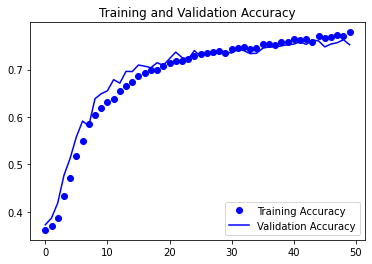

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

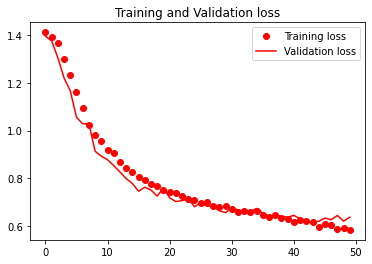

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

Buiding a confusion matrix, Here we need the predicted values of y and the ground(actual) values of y

note: Since this was a muticlass problem, we used softmax in our output layer. Adn as we know softmax outputs probabilities for all class, and therefore in order to get our predicted class, we need to take the class with the highest probabilty, thus the np.argmax argument below

In [ ]:
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)
y_true.shape

(2457,)

In [ ]:
from sklearn.metrics import confusion_matrix

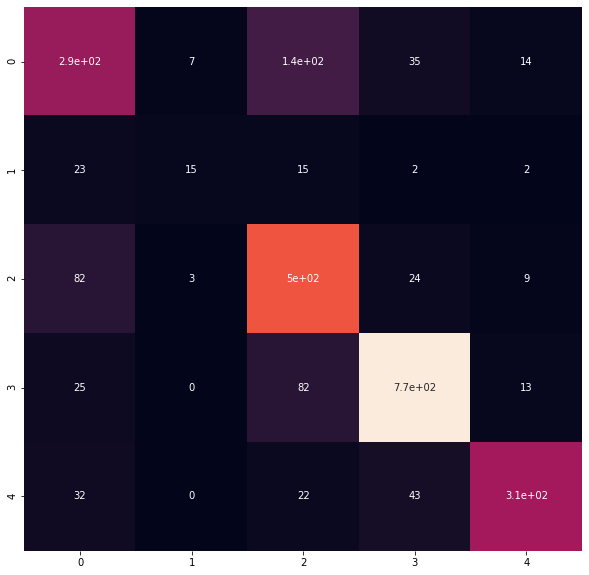

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

In the confusion matrix, the values on the diagonal running from top left corner to bottom right of the matrix show all the values that ahve been correctly classified, while all the rest of the values indicate all the misclassified images

For better understanding we will print out a grid of 25 images along with their predicted/true label

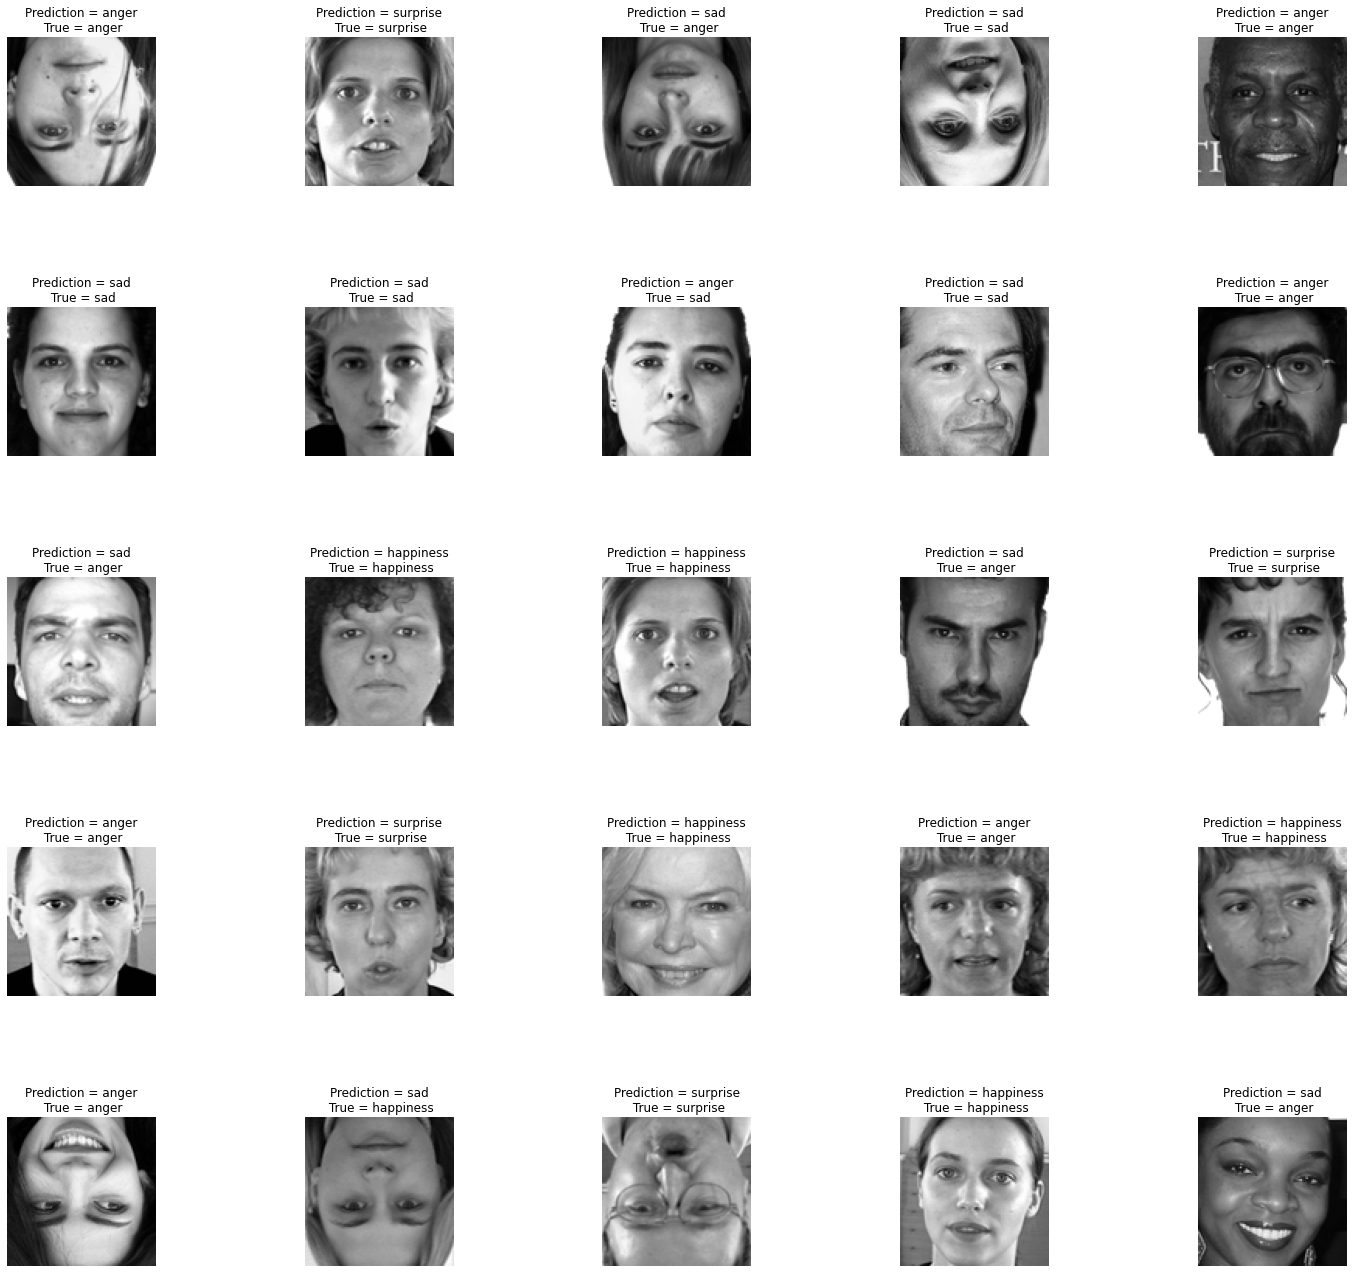

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

#COMBINE BOTH FACIAL EXPRESSION AND KEY POINTS DETECTION MODELS

Once again we will use a function, so that the code is easier to ready and reusable

In [ ]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= cols)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

In [ ]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,67.740196,60.618103,27.499979,62.519299,59.632824,60.451660,0.0,59.262096,36.069328,61.043823,19.289873,0.0,57.503883,70.026237,82.867470,66.595428,39.350147,71.186981,12.872313,69.926430,47.970665,41.528671,63.145458,17.880970,29.895346,0.0,47.011909,23.022341,47.121056,12.603550,2
1,64.125656,36.512154,31.993517,37.061001,57.890850,38.011845,0.0,37.085136,37.916225,38.182461,25.445225,0.0,55.601936,28.284607,76.144890,28.888950,41.588890,28.401098,20.092394,29.570414,47.839203,55.119450,60.657986,73.420670,34.149055,0.0,47.479057,68.864395,47.374054,81.222710,4
2,67.647499,62.405205,29.556004,63.217186,59.833622,61.644314,0.0,60.771637,37.414795,62.185982,21.715630,0.0,56.237366,71.033188,82.275742,68.870293,39.287510,70.566681,15.477315,69.800560,46.335567,41.246258,64.449013,21.474003,32.372410,0.0,47.585083,24.890728,48.051743,16.094212,2
3,68.139442,57.314407,31.606407,60.482040,59.901039,56.326134,0.0,55.886528,39.309467,58.765018,23.115141,0.0,59.275585,64.026718,82.246765,61.582027,44.275288,65.815361,17.788321,67.956177,49.908207,35.848583,61.890488,15.887609,29.124233,0.0,46.482483,17.331623,46.236969,13.886806,3
4,54.903507,36.126728,41.303650,36.522587,52.473110,37.173580,0.0,36.563484,43.654751,37.452744,38.974586,0.0,51.461121,28.404278,59.702438,27.906651,45.217999,28.279440,36.992390,29.131666,47.184746,56.051220,53.016201,71.342079,42.141735,0.0,47.716713,68.737343,47.907814,79.432159,3


#Sanity check
We will now plot the test images and their predicted keypoints and emotions

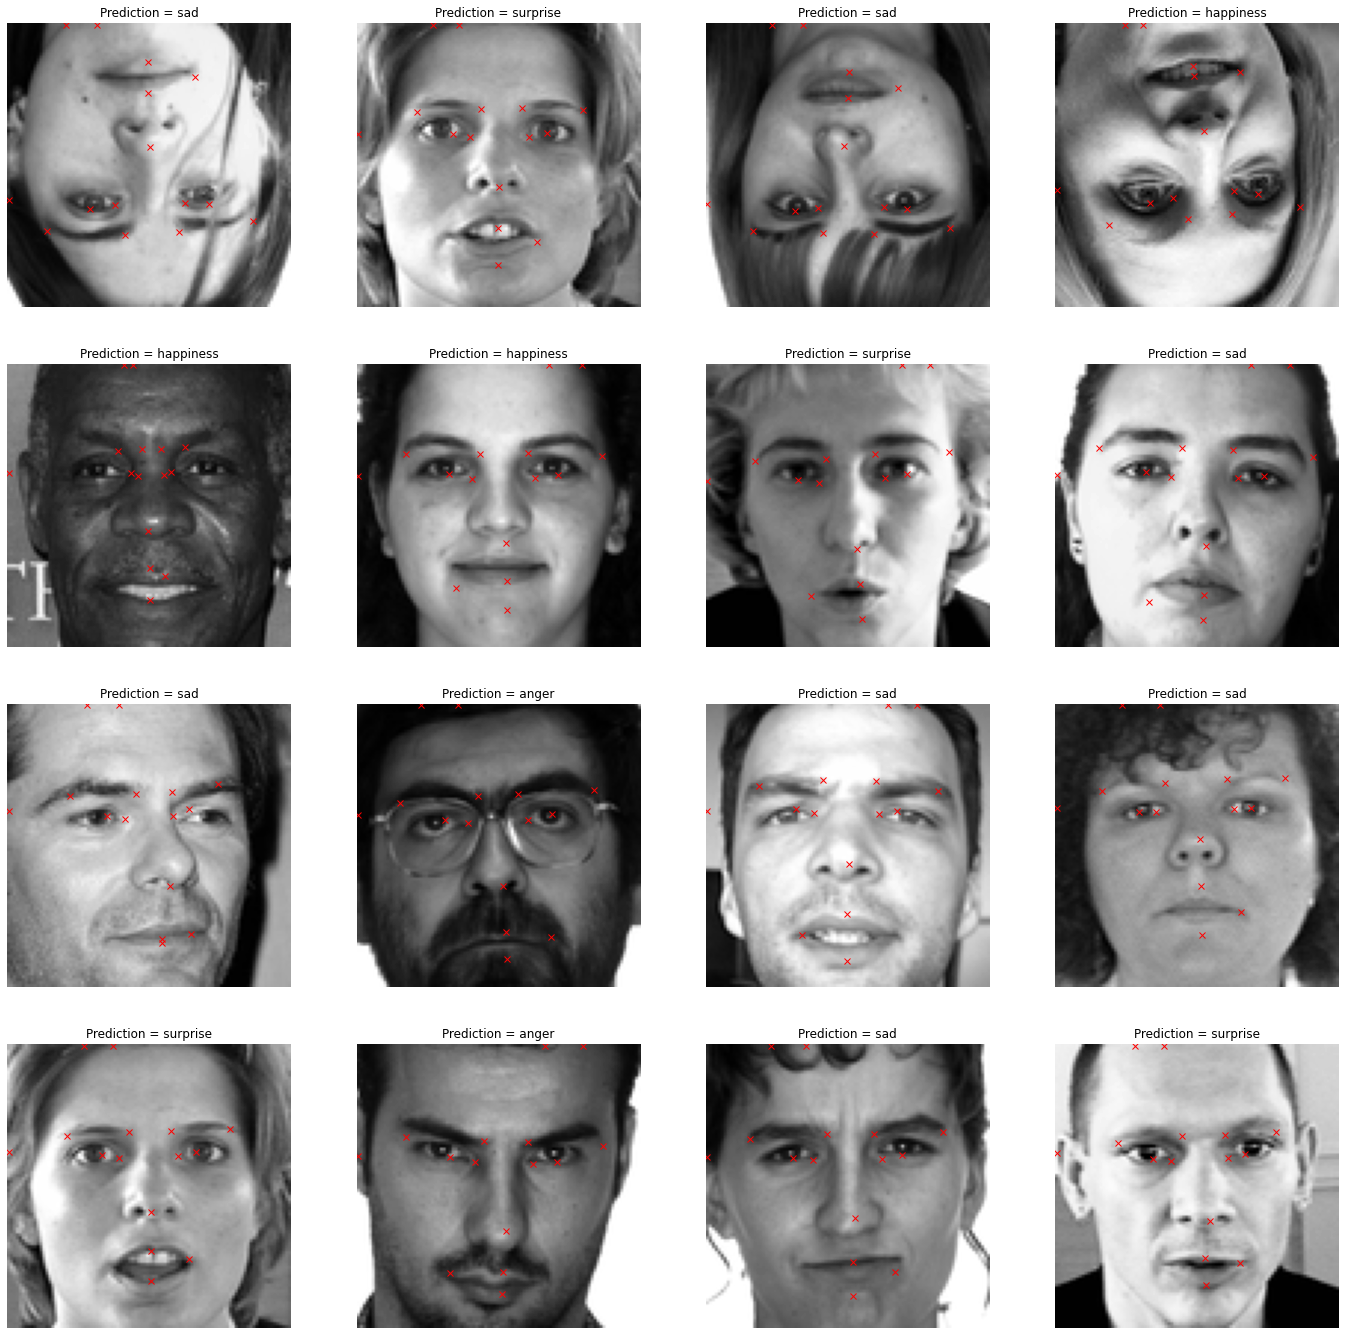

In [ ]:
fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')